In [1]:
# (1) Importing dependency
import keras
from keras.utils import np_utils

from keras.datasets import mnist, cifar10
import tflearn.datasets.oxflower17 as oxflower17

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)

from skimage import transform


from datetime import datetime

%matplotlib inline

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

(60000, 28, 28) (10000, 28, 28) (60000,) (10000,)


In [3]:
type(X_train)

numpy.ndarray

In [4]:
# (2) Get Data
x_of, y_of = oxflower17.load_data(one_hot=True)
print(x_of.shape, y_of.shape)

(1360, 224, 224, 3) (1360, 17)


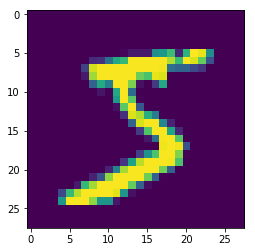

In [5]:
plt.imshow(X_train[0,:,:])

(224, 224)


/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


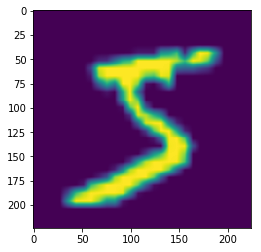

In [6]:
img = transform.resize(X_train[0,:,:], (224, 224))
print(img.shape)
plt.imshow(img)

In [7]:
def resize_pics(input_pics,size):
    output_pics = []
    for i in range(input_pics.shape[0]):
        output_pics.append(transform.resize(input_pics[i,:,:], size))
    return output_pics

/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


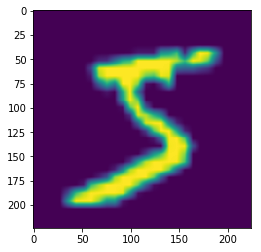

In [8]:
plt.imshow(resize_pics(X_train[0:2,:,:],(224,224))[0])

/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


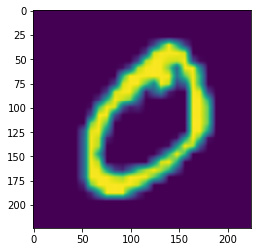

In [9]:
plt.imshow(resize_pics(X_train[0:2,:,:],(224,224))[1])

In [17]:
t = pd.DataFrame(X_train[:,0,0])
t.sample(10)

,0
50767,0
2693,0
943,0
29296,0
4605,0
1451,0
32405,0
6609,0
22033,0
24589,0


In [ ]:
X_train = resize_pics(X_train, (224,224))
X_test = resize_pics(X_test, (224,224))

/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/kranthidr/.virtualenvs/tf-lab/lib/python3.5/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


In [ ]:
print(X_train)

In [ ]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [ ]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(X_train.shape, X_test.shape ,y_train.shape ,y_test.shape)

In [ ]:
# (3) Create a sequential model
model = Sequential()

# 1st Convolutional Layer
model.add(Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),\
 strides=(4,4), padding='valid'))
model.add(Activation('relu'))
# Pooling 
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(BatchNormalization())

# 2nd Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(11,11), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 4th Convolutional Layer
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Batch Normalisation
model.add(BatchNormalization())

# 5th Convolutional Layer
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
model.add(Activation('relu'))
# Pooling
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(BatchNormalization())

# Passing it to a dense layer
model.add(Flatten())
# 1st Dense Layer
model.add(Dense(4096, input_shape=(224*224*3,)))
model.add(Activation('relu'))
# Add Dropout to prevent overfitting
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 2nd Dense Layer
model.add(Dense(4096))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# 3rd Dense Layer
model.add(Dense(1000))
model.add(Activation('relu'))
# Add Dropout
model.add(Dropout(0.4))
# Batch Normalisation
model.add(BatchNormalization())

# Output Layer
model.add(Dense(17))
model.add(Activation('softmax'))

In [ ]:
model.summary()

In [ ]:
t1 = datetime.now()
print('Execution Started at: ' + str(t1))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=64, epochs=1, verbose=1, validation_split=0.2,shuffle=True)

t2 = datetime.now()
print('Execution Ended at: ' + str(t2))
print('Time Taken: ' + str(t2-t1))

In [ ]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=1)

In [ ]:
print("Test classification rate %0.05f" %test_acc)

In [ ]:
y_hat = model.predict_classes(X_test)
test_wrong = [y for y in zip(X_test,y_hat,y_test) if y[1] != y[2]]
print("Total Misclassifcations in Test Data(10000): %d"%len(test_wrong))
plt.figure(figsize=(10, 10))
for ind, val in enumerate(test_wrong[:100]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.subplot(10, 10, ind + 1)
    im = 1 - val[0].reshape((28,28))
    plt.axis("off")
    plt.text(0, 0, val[2], fontsize=14, color='blue')
    plt.text(8, 0, val[1], fontsize=14, color='red')
    plt.imshow(im, cmap='gray')